In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

def pre_process_data(dataframe):
    dataframe['duration'] = dataframe['tpep_dropoff_datetime'] - dataframe['tpep_pickup_datetime']
    dataframe['duration'] = (dataframe['duration'].dt.total_seconds()/60).round(2)
    # print(dataframe.duration.describe(percentiles=[0.95, 0.99]))
    dataframe = dataframe.query("(duration > 1) and (duration < 60)")
    categorical = ['PULocationID', 'DOLocationID']
    dataframe[categorical] = dataframe[categorical].astype(str)
    dataframe['PU_DO'] = dataframe['PULocationID'] + '_' + dataframe['DOLocationID']
    return dataframe

: 

In [3]:
train = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
test = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')

train = pre_process_data(train)
test = pre_process_data(test)

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
model_used = 'linear_regression'
dv = DictVectorizer()

train_dicts = train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

target = 'duration'
y_train = train[target].values
y_test = test[target].values


def eval_model(model_used, X_train, y_train, y_val):
    if model_used == 'linear_regression':
        model = LinearRegression()
    elif model_used == 'lasso':
        model = Lasso()
    model.fit(X_train, y_train)
    predict = model_used.predict(X_train)
    msqre = mean_squared_error(y_val, predict, squared=False)
    print(msqre)
    return model, msqre

linear_regression_model, linear_regression_msqre = eval_model(model_used='linear_regression', X_train=X_train, y_train=y_train, y_val=y_test)
lasso_model, lasso_msqre = eval_model(model_used='lasso', X_train=X_train, y_train=y_train, y_val=y_test)

/tmp/ipykernel_38202/1398174493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[categorical] = dataframe[categorical].astype(str)
/tmp/ipykernel_38202/1398174493.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['PU_DO'] = dataframe['PULocationID'] + '_' + dataframe['DOLocationID']
/tmp/ipykernel_38202/1398174493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

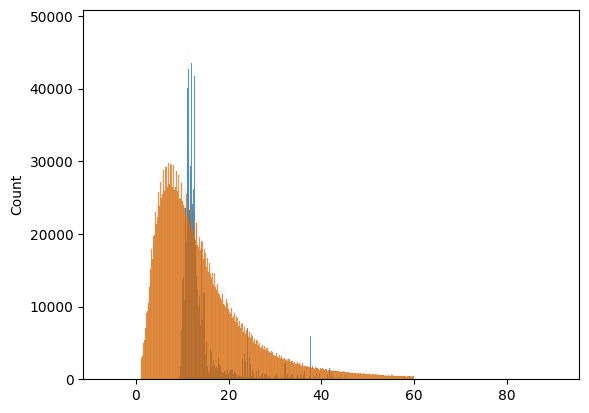

In [8]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(7.9496187672102305)